# Denoising a signal using FFT

Created on **28th January 2024**

In this notebook we will look experiment with obtaining the DFT of a signal corrupted with noise and work in the spectral domain to remove the noise.

Concepts discussed:
- Discrete Fourier Transform
- Random Noise
- Filtering

First let us import the relevant modules. 

## Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import IPython

plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 8

%matplotlib inline

## Generate a signal and corrupt it with noise

Now that all libraries are imported, we will create a clean signal with two **pure tones**.

> **Tone:** <br>
> In signal processing, a tone is simply a sinusoidal signal with one specific frequency. Eg: 256 Hz tone is middle C in the piano.

Our signal however is a combination of two tones namely `TONE1` and `TONE2`. You may change these values as you like.

In [3]:
# Set delta time
dt = 0.001

# Define tones
TONE1 = 50
TONE2 = 120

# Create the combined signal
t = np.arange(0, 1, dt)
x = np.sin(2 * np.pi * TONE1 * t) + np.sin(2 * np.pi * TONE2 * t)

The signal in time domain representation is as follows,

$$x(t) = sin(2 \pi \cdot 50t) + sin(2 \pi \cdot 120t) $$ 

Now let's plot this signal to see how it looks.

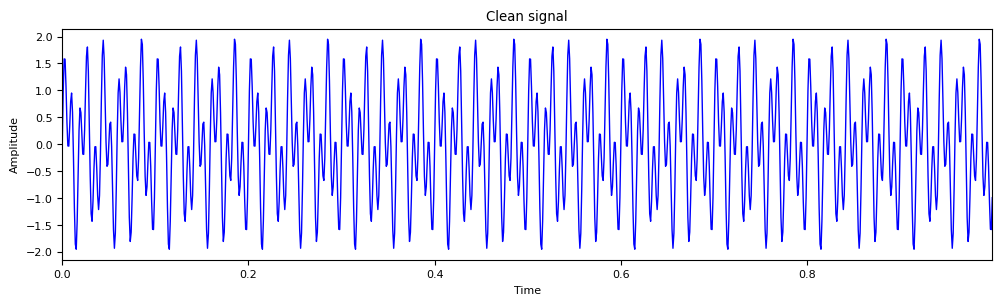

In [37]:
# Plot
plt.plot(t, x, linewidth=1.0, color='b')
plt.title('Clean signal');
plt.xlim(t[0], t[-1]);
plt.xlabel('Time');
plt.ylabel('Amplitude');

Although it is not a sinusoid now, clearly it has preserved some of the sinusoidal qualities like periodicity. Let's take a closer look.

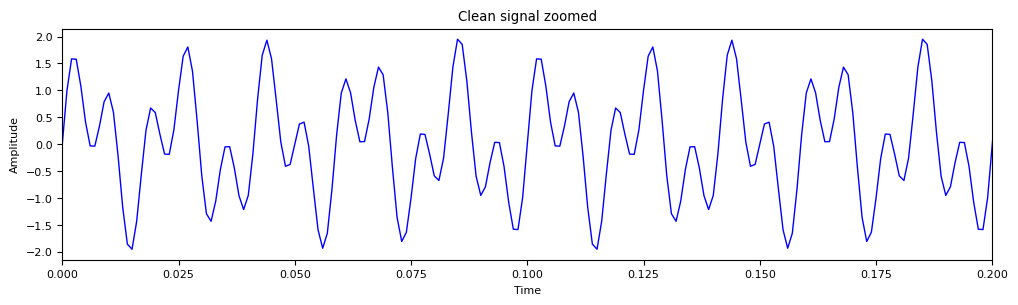

In [32]:
plt.plot(t, x, linewidth=1.0, color='b')
plt.title('Clean signal zoomed');

# Zoom into a smaller region
plt.xlim(0, 0.2);

plt.xlabel('Time');
plt.ylabel('Amplitude');

Now let us corrupt the signal with artificially generated noise. This noise $N(t)$ will be randomly generated.

$$\hat{x}(t) = x(t) + N(t)$$

In [15]:
# Introduce random noise
x_hat = x + 2.5 * np.random.randn(len(t))

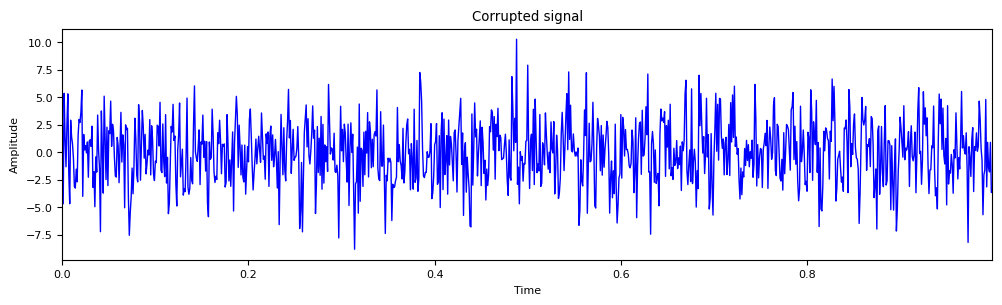

In [33]:
plt.plot(t, x_hat, linewidth=1.0, color='b')
plt.title('Corrupted signal');
plt.xlim(t[0], t[-1]);

plt.xlabel('Time');
plt.ylabel('Amplitude');

It is clear that all original signal properties has been lost. We see no periodicity or sinuosoidal nature. The signal shape is noisy.

## Taking the FFT

Let us now observe this corrupted signal in the frequency domain. To do this, we will use the `Fast Fourier Transform (FFT)` algorithm. 

> **Note**
> The FFT computes the Discrete Fourier Transform (DFT) of a digital signal not the Discrete Time Fourier Transform. 

Also, note that **spectrum** is calculated from the DFT by,

$$|X[k]|^2 = X[k] \cdot X^*[k]$$

where $X^*[k]$ is the complex conjugate of $X[k]$.



In [21]:
# Take the FFT and obtain the DFT
N = len(t)
X = np.fft.fft(x_hat, N)

# Use DFT to calculate spectrum
spectrum = X * np.conj(X) / N

# Normalize(Map) the digital frequency and plot
freq = 1 / (dt * N) * np.arange(N)
L = np.arange(1, np.floor(N/2), dtype='int')

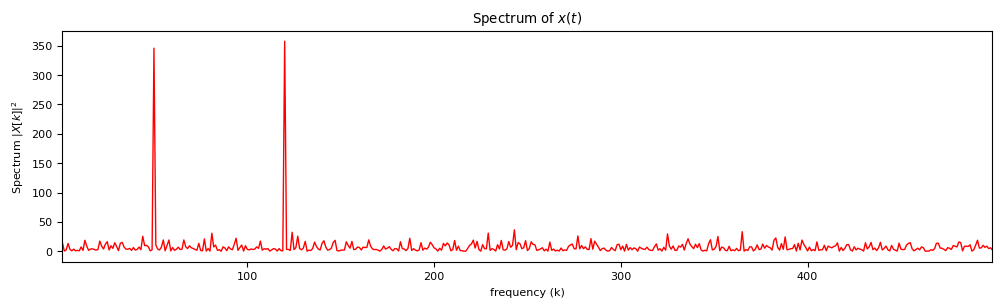

In [28]:
plt.plot(freq[L], spectrum[L], linewidth=1.0, color='r');
plt.xlim(freq[L[0]], freq[L[-1]])
plt.title('Spectrum of $x(t)$')
plt.xlabel('frequency (k)')
plt.ylabel('Spectrum $|X[k]|^2$')
plt.show()


In the spectrum, we can observe two spikes at the `TONE1` and `TONE2` frequencies. Rest of the spectrum has ripples of small amplitudes which comes from the random noise. This is called a **sea of noise**. We need to remove or reduce these ripples to remove the noise from the signal.

## Filtering noise

We will implement a simple solution to remove the noise, by making zero all the frequency components below a certain threshold. Since both the pure tone frequencies are above 100, we can select the `threshold` to be 100.

In [31]:
THRESHOLD = 100

# Get k values which are higher than THRESHOLD
indices = spectrum > THRESHOLD

# Make the rest zero
filtered = spectrum * indices

# Filter the DFT also
X = X * indices

# Take inverse FFT
filtered_signal = np.fft.ifft(X)

The `ifft()` function takes the Inverse DFT according to the FFT algorithm. It gives back the time domain signal after doing the filtering.

#### Frequency plot after filtering

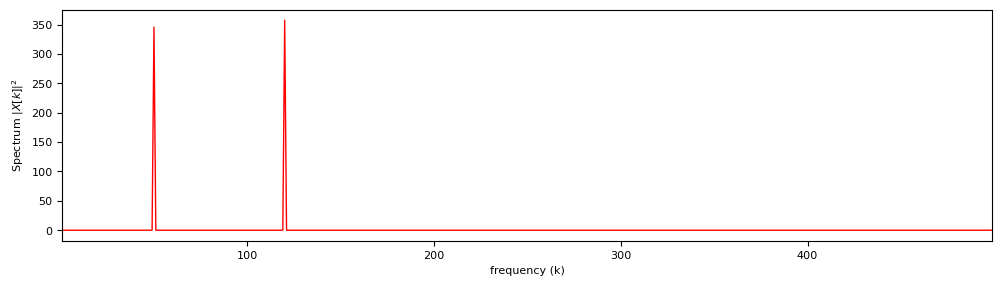

In [38]:
plt.plot(freq[L], filtered[L], linewidth=1.0, color='r');
plt.xlim(freq[L[0]], freq[L[-1]])
plt.xlabel('frequency (k)')
plt.ylabel('Spectrum $|X[k]|^2$')
plt.show()

> **Note:** <br>
> This is not actually a conventional digital filter. We are simply setting a threshold and removing all frequencies which are under that threshold.

#### Time domain plot after filtering

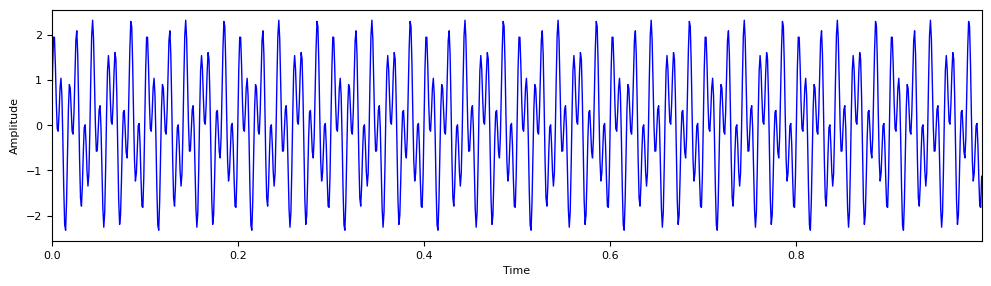

In [39]:
plt.plot(t, filtered_signal, linewidth=1.0, color='b');
plt.xlim(t[0], t[-1])
plt.xlabel('Time');
plt.ylabel('Amplitude');
plt.show()

As you can see, the noisy signal is reverted back to the originial clean signal.